In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Connecting with Twitter API

In [2]:
%run ./keys.ipynb
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Political Sentiment:
- Dataframes of tweets of each party. 
- Dataframes of mentions of users for each party. 

- Machine learning for evalutating the sentiment of tweets and mentions.

## 1. PARTIDO POPULAR

In [3]:
# last 100 tweets of PP
pp_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='populares',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

In [4]:
pp_json_response = [tweet._json for tweet in pp_tweets]
df_pp_alltweets = pd.json_normalize(pp_json_response)

In [5]:
# numerical columns pp
df_pp_alltweets.describe()

,id,retweet_count,favorite_count,user.id,user.followers_count,user.friends_count,user.listed_count,user.favourites_count,user.statuses_count,quoted_status_id,...,retweeted_status.quoted_status.user.statuses_count,retweeted_status.quoted_status.user.lang,retweeted_status.quoted_status.geo,retweeted_status.quoted_status.coordinates,retweeted_status.quoted_status.place,retweeted_status.quoted_status.contributors,retweeted_status.quoted_status.retweet_count,retweeted_status.quoted_status.favorite_count,retweeted_status.retweet_count,retweeted_status.favorite_count
count,1.000000e+02,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,7.000000e+00,...,4.000000,0.0,0.0,0.0,0.0,0.0,4.000000,4.000000,34.000000,34.000000
mean,1.380728e+18,299.590000,205.810000,20509689.0,820246.0,5295.0,4903.0,44480.0,102035.0,1.380710e+18,...,178818.000000,NaN,NaN,NaN,NaN,NaN,1166.750000,3262.250000,600.117647,1836.382353
std,2.721618e+14,729.037959,413.273229,0.0,0.0,0.0,0.0,0.0,0.0,1.830797e+14,...,203258.299565,NaN,NaN,NaN,NaN,NaN,978.478538,2704.354806,1147.663470,4246.800179
min,1.380249e+18,1.000000,0.000000,20509689.0,820246.0,5295.0,4903.0,44480.0,102035.0,1.380453e+18,...,31251.000000,NaN,NaN,NaN,NaN,NaN,357.000000,588.000000,58.000000,129.000000
25%,1.380484e+18,61.250000,0.000000,20509689.0,820246.0,5295.0,4903.0,44480.0,102035.0,1.380559e+18,...,72740.250000,NaN,NaN,NaN,NaN,NaN,631.500000,1545.750000,136.000000,365.500000
50%,1.380792e+18,125.000000,76.500000,20509689.0,820246.0,5295.0,4903.0,44480.0,102035.0,1.380793e+18,...,102578.000000,NaN,NaN,NaN,NaN,NaN,865.500000,2827.500000,224.000000,563.500000
75%,1.380906e+18,215.500000,169.750000,20509689.0,820246.0,5295.0,4903.0,44480.0,102035.0,1.380838e+18,...,208655.750000,NaN,NaN,NaN,NaN,NaN,1400.750000,4544.000000,337.000000,1078.250000
max,1.381209e+18,5412.000000,3220.000000,20509689.0,820246.0,5295.0,4903.0,44480.0,102035.0,1.380932e+18,...,478865.000000,NaN,NaN,NaN,NaN,NaN,2579.000000,6806.000000,5412.000000,22536.000000


In [6]:
df_pp_alltweets.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status.quoted_status.possibly_sensitive,retweeted_status.quoted_status.lang,retweeted_status.retweet_count,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.possibly_sensitive,retweeted_status.lang,retweeted_status.entities.media,retweeted_status.extended_entities.media
0,Sun Apr 11 11:36:05 +0000 2021,1381209433364172802,1381209433364172802,👉 @bea_fanjul: “Desde Moncloa quieren a los es...,False,"[0, 238]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Apr 11 11:30:19 +0000 2021,1381207985402343425,1381207985402343425,👉 @bea_fanjul: “Tenemos que conseguir que Madr...,False,"[0, 153]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# now, we select just the columns that are important for our analysis:

columns_selected = ['created_at', 'id', 'full_text','retweeted_status.full_text', 'display_text_range', 
                    'source', 'retweet_count', 'favorite_count', 'user.followers_count', 
                    'user.friends_count', 'user.statuses_count', 'entities.hashtags', 'entities.urls']

In [8]:
df_pp = df_pp_alltweets[columns_selected]

In [55]:
def transforming_format_dates(column):
    
    list_dates = list(column)
    
    new_format_dates = []

    for d in list_dates:
        old_format_date = datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y')
        new_format_date = datetime.strftime(old_format_date, '%d-%m-%Y')
        new_format_dates.append(new_format_date)
        
    return new_format_dates

In [59]:
df_pp['created_at'] = transforming_format_dates(df_pp['created_at'])

<ipython-input-59-796c04f5b5dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pp['created_at'] = transforming_format_dates(df_pp['created_at'])


In [60]:
df_pp

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls,month
0,11-04-2021,1381209433364172802,👉 @bea_fanjul: “Desde Moncloa quieren a los es...,NaN,"[0, 238]","<a href=""https://www.twitter.com/"" rel=""nofoll...",1,2,820246,5295,102035,"[{'text': 'CongresoLibertad', 'indices': [221,...",[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
1,11-04-2021,1381207985402343425,👉 @bea_fanjul: “Tenemos que conseguir que Madr...,NaN,"[0, 153]","<a href=""https://www.twitter.com/"" rel=""nofoll...",7,17,820246,5295,102035,"[{'text': 'CongresoLibertad', 'indices': [136,...",[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
2,11-04-2021,1381207218717126660,"👉 @bea_fanjul: “Orgullo, ejemplo y ambición. S...",NaN,"[0, 237]","<a href=""https://www.twitter.com/"" rel=""nofoll...",12,18,820246,5295,102035,"[{'text': 'CongresoLibertad', 'indices': [220,...",[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
3,11-04-2021,1381203300012318724,👉 @AlmeidaPP_: “Esto de la izquierda es curios...,NaN,"[0, 171]","<a href=""https://www.twitter.com/"" rel=""nofoll...",33,82,820246,5295,102035,"[{'text': 'CongresoLibertad', 'indices': [154,...",[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
4,11-04-2021,1381202588490727425,👉 @AlmeidaPP_: “Quedan 23 días para que esa re...,NaN,"[0, 219]","<a href=""https://www.twitter.com/"" rel=""nofoll...",51,67,820246,5295,102035,"[{'text': 'CongresoLibertad', 'indices': [202,...",[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,08-04-2021,1380265902562762754,RT @IdiazAyuso: Las elecciones han obrado el m...,Las elecciones han obrado el milagro: Madrid y...,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",3493,0,820246,5295,102035,[],[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
96,08-04-2021,1380252373378068483,“No pienso subir los impuestos en Madrid y voy...,NaN,"[0, 268]","<a href=""https://studio.twitter.com"" rel=""nofo...",192,557,820246,5295,102035,[],[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
97,08-04-2021,1380250707287281667,Se es madrileño desde el primer día. \n\n“La l...,NaN,"[0, 197]","<a href=""https://studio.twitter.com"" rel=""nofo...",201,436,820246,5295,102035,[],[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"
98,08-04-2021,1380250336783433728,"“En febrero, en la Consejería de Sanidad, reci...",NaN,"[0, 153]","<a href=""https://studio.twitter.com"" rel=""nofo...",164,317,820246,5295,102035,[],[],"[Sun, Apr, 11, 11:30:19, +0000, 2021]"


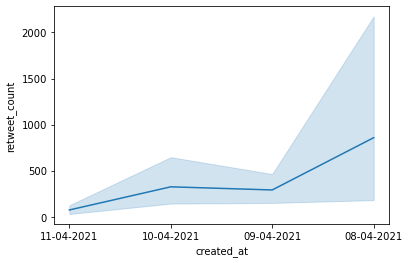

In [62]:
# visualization
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=df_pp, x='created_at', y='retweet_count')

## 2. PSOE

In [32]:
# last 100 tweets of PSOE
psoe_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='psoe',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

In [33]:
psoe_json_response = [tweet._json for tweet in psoe_tweets]
df_psoe_alltweets = pd.json_normalize(psoe_json_response)

In [38]:
df_psoe_alltweets[columns_selected].head()

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:06:00 +0000 2021,1380809276000702469,🙋🏻‍♀️No te pierdas el Acto sobre Feminismo hoy...,NaN,"[0, 264]","<a href=""https://studio.twitter.com"" rel=""nofo...",8,8,822067,13447,120021,"[{'text': 'GobernarEnSerio', 'indices': [247, ...","[{'url': 'https://t.co/zTSjqzAlvn', 'expanded_..."
1,Sat Apr 10 08:05:30 +0000 2021,1380794052426219520,❌Condenamos los actos vandálicos a la sede del...,NaN,"[0, 229]","<a href=""http://twitter.com/download/iphone"" r...",49,72,822067,13447,120021,[],"[{'url': 'https://t.co/ADTPcFz4xf', 'expanded_..."
2,Sat Apr 10 08:01:00 +0000 2021,1380792918374412291,Avanzar en una economía descarbonizada y segur...,NaN,"[0, 274]","<a href=""https://studio.twitter.com"" rel=""nofo...",24,42,822067,13447,120021,"[{'text': 'AmbiciónClimática', 'indices': [254...",[]
3,Sat Apr 10 07:49:54 +0000 2021,1380790124158582785,RT @equipoGabilondo: 📌 Hoy hablamos de #Femini...,📌 Hoy hablamos de #Feminismo en un acto que ce...,"[0, 139]","<a href=""http://twitter.com/download/iphone"" r...",72,0,822067,13447,120021,"[{'text': 'Feminismo', 'indices': [39, 49]}]",[]
4,Sat Apr 10 07:33:00 +0000 2021,1380785871696367618,🙋🏻‍♀️No te pierdas el Acto sobre Feminismo hoy...,NaN,"[0, 275]","<a href=""https://studio.twitter.com"" rel=""nofo...",51,74,822067,13447,120021,"[{'text': 'GobernarEnSerio', 'indices': [258, ...",[]


## 3. PODEMOS

In [35]:
# last 100 tweets of PODEMOS
podemos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='podemos',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

podemos_json_response = [tweet._json for tweet in podemos_tweets]
df_podemos_alltweets = pd.json_normalize(podemos_json_response)

In [37]:
df_podemos_alltweets[columns_selected].head()

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:00:00 +0000 2021,1380807766760062979,"Frente a su violencia, su odio y sus mentiras,...",NaN,"[0, 71]","<a href=""https://studio.twitter.com"" rel=""nofo...",45,95,1525117,19967,118542,"[{'text': 'QueHableLaMayoría', 'indices': [47,...",[]
1,Sat Apr 10 08:58:25 +0000 2021,1380807368032849924,RT @PodemosGetafe: Basta ya del abandono de nu...,Basta ya del abandono de nuestros colegios y h...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",41,0,1525117,19967,118542,[],[]
2,Sat Apr 10 08:58:16 +0000 2021,1380807332683190272,RT @PodemosMostoles: Porque defender los #Serv...,Porque defender los #ServiciosPublicos es la b...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",28,0,1525117,19967,118542,"[{'text': 'ServiciosPublicos', 'indices': [41,...",[]
3,Sat Apr 10 08:55:24 +0000 2021,1380806611392991235,"RT @IdoiaVR: Porque somos muchos y muchas más,...","Porque somos muchos y muchas más, el #4M parti...","[0, 140]","<a href=""https://about.twitter.com/products/tw...",34,0,1525117,19967,118542,"[{'text': '4M', 'indices': [50, 53]}, {'text':...",[]
4,Sat Apr 10 08:50:00 +0000 2021,1380805249443581953,El 4 de mayo será tu voz la que se escuche. \n...,NaN,"[0, 64]","<a href=""https://about.twitter.com/products/tw...",54,91,1525117,19967,118542,"[{'text': 'QueHableLaMayoría', 'indices': [46,...",[]


## 4. CUIDADANOS

In [39]:
# last 100 tweets of Ciudadanos
ciudadanos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='ciudadanoscs',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

ciudadanos_json_response = [tweet._json for tweet in ciudadanos_tweets]
df_ciudadanos_alltweets = pd.json_normalize(ciudadanos_json_response)

In [40]:
df_ciudadanos_alltweets[columns_selected].head(3)

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:13:16 +0000 2021,1380811106793496577,Cuando Cs habla de sensatez y diálogo nos cree...,NaN,"[0, 253]","<a href=""https://studio.twitter.com"" rel=""nofo...",0,0,521536,89295,174910,"[{'text': 'MadrileñosPorEdmundoBal', 'indices'...",[]
1,Sat Apr 10 09:10:41 +0000 2021,1380810457070592008,💪🍊 Para el #4M necesitamos mucha ilusión y esf...,NaN,"[0, 219]","<a href=""https://studio.twitter.com"" rel=""nofo...",3,1,521536,89295,174910,"[{'text': '4M', 'indices': [11, 14]}, {'text':...",[]
2,Sat Apr 10 09:06:39 +0000 2021,1380809442397200386,Madrid\n\n🏍 Es dinámica y moderna.\n🏃‍♂️ Es es...,NaN,"[0, 273]","<a href=""https://studio.twitter.com"" rel=""nofo...",32,35,521536,89295,174910,"[{'text': 'MadrileñosPorEdmundoBal', 'indices'...",[]


## 5. VOX

In [41]:
# last 100 tweets of VOX
vox_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='vox_es',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

vox_json_response = [tweet._json for tweet in vox_tweets]
df_vox_alltweets = pd.json_normalize(vox_json_response)

In [42]:
df_vox_alltweets[columns_selected].head(3)

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 08:31:41 +0000 2021,1380800638989316097,RT @eldisidenteOK: El testimonio de un obrero ...,El testimonio de un obrero emocionado que vivi...,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",603,0,438096,1255,55231,[],[]
1,Sat Apr 10 08:25:59 +0000 2021,1380799204780601344,RT @Santi_ABASCAL: #SanFernandoDeHenaresEnPie\...,#SanFernandoDeHenaresEnPie\nSan Fernando de He...,"[0, 129]","<a href=""http://twitter.com/download/iphone"" r...",264,0,438096,1255,55231,"[{'text': 'SanFernandoDeHenaresEnPie', 'indice...",[]
2,Sat Apr 10 08:18:39 +0000 2021,1380797362860343297,RT @Igarrigavaz: VOX comienza su ofensiva para...,VOX comienza su ofensiva para fiscalizar TV3 y...,"[0, 113]","<a href=""http://twitter.com/download/iphone"" r...",1346,0,438096,1255,55231,[],"[{'url': 'https://t.co/70et558epG', 'expanded_..."
